# Bosonic sinkhorn

Install `bfsinkhorn` if necessary

In [4]:
%pip install git+https://github.com/DerkKooi/bfsinkhorn

  Cloning https://github.com/DerkKooi/bfsinkhorn to /private/var/folders/m3/1440kr6n0mz0kqlrfbszmzk00000gn/T/pip-req-build-0hmnwnxx
  Running command git clone --filter=blob:none --quiet https://github.com/DerkKooi/bfsinkhorn /private/var/folders/m3/1440kr6n0mz0kqlrfbszmzk00000gn/T/pip-req-build-0hmnwnxx
  Resolved https://github.com/DerkKooi/bfsinkhorn to commit b1dcc96dc4ea3e1601a93e6317946f8993d380e2
  Installing build dependencies ... 

Start with some imports.

In [1]:
# Toggle saving the figures
save = False

from functools import partial

# Import numpy
import numpy as np

# Import for plotting and settings for the figures
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Import jax and set floats to 64-bit
from jax import jit
from jax.config import config
import jax.numpy as jnp

# Use double precision instead of standard single precision
config.update("jax_enable_x64", True)

# Try to import bfsinkhorn, if it's not installed, try to import it from the cloned directory
try:
    import bfsinkhorn
except ModuleNotFoundError:
    import sys
    sys.path.append('..')
    import bfsinkhorn

# Import the bosonic sinkhorn
from bfsinkhorn.boson import Sinkhorn

# Plotting settings
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='sans-serif')
plt.rc('lines', markersize=8)
single_column = 3 + 3/8



## Figure 2: synthetic boson distribution 1

Construct a bosonic distribution of occupation numbers, with one heavily occupied orbital and the remaining weakly occupied. The decay is linear in the index of the occupation number.

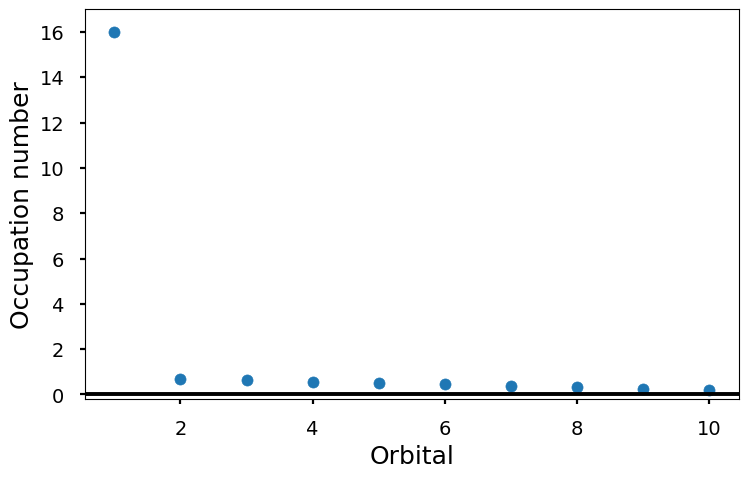

In [2]:
#Set number of orbitals norb and particles N
norb = 10
N = 20

#Set the occupation of the first and second orbital, then fill the rest decaying linearly.
n = np.empty(norb)
n[0] = 16
n[1] = 0.7
n[1:] = n[1] + np.arange(norb-1)*-2*(n[0] - N + n[1]*(norb - 1))/(norb**2 - 3*norb + 2 )

if np.any(n < 0.):
    print('some occupation smaller than zero')
    
single_column = 3 + 3/8

plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))
plt.scatter(np.arange(norb)+1, n)
plt.xlabel('Orbital')
plt.ylabel('Occupation number')
plt.ylim(-0.2, n[0]+1)
plt.axhline(y=0, color='0', linestyle='-')
plt.show()

Run both the bosonic and regular ('old') Sinkhorn.

In [3]:
solver = Sinkhorn(N)
print('Running Bosonic sinkhorn with fixed iterations (to collect n_error) and GC guess')
result = solver.run_sinkhorn_fixed_iters(n, n_iters=50)
solver_old = Sinkhorn(N, old=True)
print('Running regular sinkhorn with fixed iterations (to collect n_error) and GC guess')
result_old = solver_old.run_sinkhorn_fixed_iters(n, n_iters=50)

Running Bosonic sinkhorn with fixed iterations (to collect n_error) and GC guess
Running regular sinkhorn with fixed iterations (to collect n_error) and GC guess


Bosonic sinkhorn converges rapidly, while the regular ("old") Sinkhorn does not converge at all. Make a nice plot to show this. 

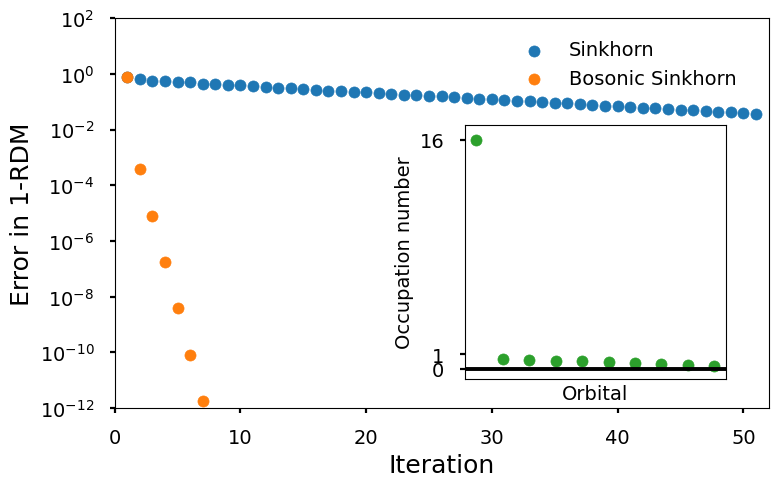

In [4]:
fig = plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))

plt.yscale('log')
plt.scatter(np.arange(len(result_old['n_error']))+1, result_old['n_error'], label='Sinkhorn')
plt.scatter(np.arange(len(result['n_error']))+1, result['n_error'], label='Bosonic Sinkhorn')
plt.legend(loc=(0.6, 0.8), framealpha=0)
plt.xlabel('Iteration')
plt.ylabel('Error in 1-RDM')
plt.ylim(10**-12, 10**2)
plt.xlim(0, 52)
ax = fig.get_axes()[0]
axins = inset_axes(ax, width="40%", height="65%", loc=7, bbox_to_anchor=(-0.05,-0.1,1,1), bbox_transform=ax.transAxes)
plt.scatter(np.arange(norb)+1, n, color='C2')
plt.xlabel('Orbital', fontsize=SMALL_SIZE)
plt.ylabel('Occupation number', fontsize=SMALL_SIZE)
plt.ylim(-0.7, n[0]+1)
plt.xticks([])
plt.yticks([0, 1, n[0]])
plt.axhline(y=0, color='0', linestyle='-')
if save:
    plt.savefig('fig2_boson_convergence.pdf',
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0.1)
plt.show()

# Supplementary figure 1: Synthetic boson distribution 2

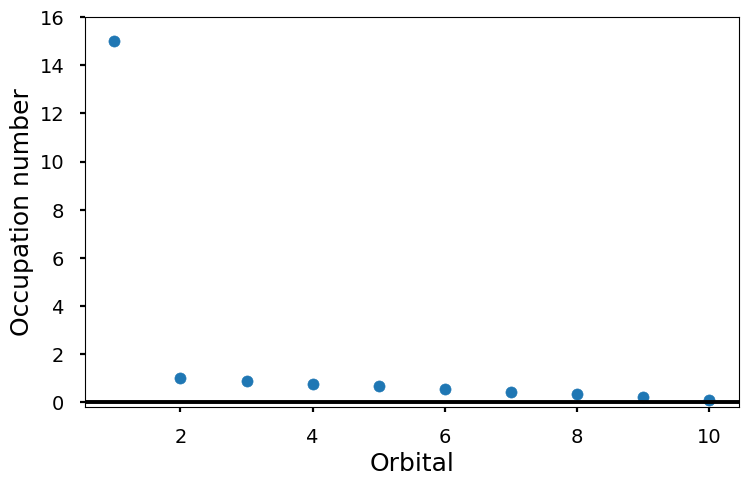

Running Bosonic Sinkhorn
Running Sinkhorn


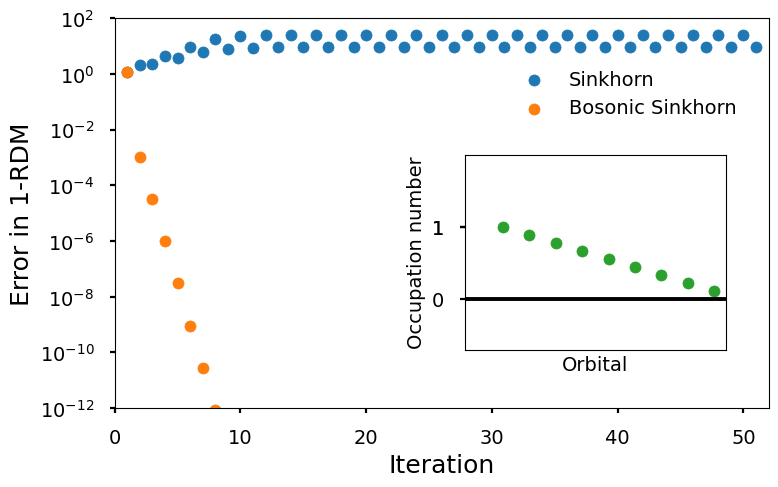

In [5]:
#Set number of orbitals norb and particles N
norb = 10
N = 20

#Set the occupation of the first and second orbital, then fill the rest decaying linearly.
n = np.empty(norb)
n[0] = 15
n[1] = 1.0
n[1:] = n[1] + np.arange(norb-1)*-2*(n[0] - N + n[1]*(norb - 1))/(norb**2 - 3*norb + 2 )

if np.any(n < 0.):
    print('some occupation smaller than zero')
    
single_column = 3 + 3/8

plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))
plt.scatter(np.arange(norb)+1, n)
plt.xlabel('Orbital')
plt.ylabel('Occupation number')
plt.ylim(-0.2, n[0]+1)
plt.axhline(y=0, color='0', linestyle='-')
plt.show()

#Run Sinkhorn
print('Running Bosonic Sinkhorn')
solver = Sinkhorn(N)
result = solver.run_sinkhorn_fixed_iters(n, n_iters=50)
print('Running Sinkhorn')
solver_old = Sinkhorn(N, old=True)
result_old = solver_old.run_sinkhorn_fixed_iters(n, n_iters=50)

#Make the plot
fig = plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))

plt.yscale('log')
plt.scatter(np.arange(len(result_old['n_error']))+1, result_old['n_error'], label='Sinkhorn')
plt.scatter(np.arange(len(result['n_error']))+1, result['n_error'], label='Bosonic Sinkhorn')
plt.legend(loc=(0.6, 0.725), framealpha=0)
plt.xlabel('Iteration')
plt.ylabel('Error in 1-RDM')
plt.ylim(10**-12, 10**2)
plt.xlim(0, 52)
ax = fig.get_axes()[0]
axins = inset_axes(ax, width="40%", height="50%", loc=7, bbox_to_anchor=(-0.05,-0.1,1,1), bbox_transform=ax.transAxes)
plt.scatter(np.arange(norb)+1, n, color='C2')
plt.xlabel('Orbital', fontsize=SMALL_SIZE)
plt.ylabel('Occupation number', fontsize=SMALL_SIZE)
plt.ylim(-0.7, n[1]+1)
plt.xticks([])
plt.yticks([0, 1, n[1]])
plt.axhline(y=0, color='0', linestyle='-')
if save:
    plt.savefig('Sfig1_boson_convergence.pdf',
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0.1)
plt.show()

Bosonic sinkhorn converges rapidly, while the regular ("old") Sinkhorn does not converge at all.

# Supplementary figure 2: large amount of bosons

Running bosonic sinkhorn
Running regular sinkhorn


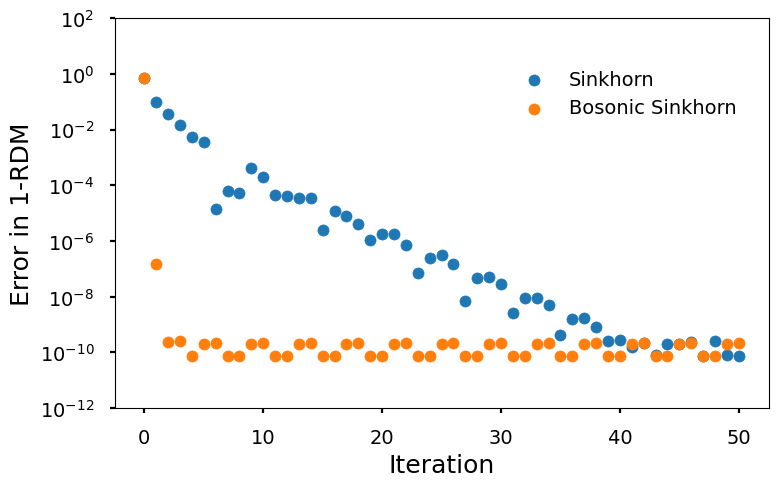

In [7]:
#Set number of orbitals norb and particles N
norb = 10000
N = 1000

#Set the occupation of the first and second orbital, then fill the rest decaying linearly.
n = np.empty(norb)
n[0] = 750
n[1:] = np.random.rand(norb-1)
n[1:] = n[1:]/(np.sum(n[1:]))*(N-n[0])
n = np.flip(np.sort(n))

print('Running bosonic sinkhorn')
solver = Sinkhorn(N)
result = solver.run_sinkhorn_fixed_iters(n, n_iters=50)
print('Running regular sinkhorn')
solver_old = Sinkhorn(N, old=True)
result_old = solver_old.run_sinkhorn_fixed_iters(n, n_iters=50)

fig = plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))

plt.yscale('log')
plt.scatter(np.arange(len(result_old['n_error'])), result_old['n_error'], label='Sinkhorn')
plt.scatter(np.arange(len(result['n_error'])), result['n_error'], label='Bosonic Sinkhorn')
plt.legend(loc=(0.6, 0.725), framealpha=0)
plt.xlabel('Iteration')
plt.ylabel('Error in 1-RDM')
plt.ylim(10**-12, 10**2)
if save:
    plt.savefig('Sfig3_large_boson_convergence.pdf',
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0.1)
plt.show()